In [1]:
"""
Notebook Matrix Profile – ampiimts Python 3.11 package

Goal:
From pre processing signal with original value, normalize value, timestamp. 
We identify discord and motifs with a fix window on matrix profile methode (stumpy.maamp)
"""
import pandas as pd
import ampiimts
import time
import os 

In [2]:
#import files
folder = '../../dataset/pollution'
pds = []
with os.scandir(folder) as entries:
    for entry in entries:
        if entry.is_file() and entry.name.endswith('csv'):
            # list of sensors with some parameters -> list[pd.DataFrame[timestamp, value1, value2, etc..., latitude, longitude]]) 
            pds.append(pd.read_csv(folder+'/'+entry.name))

In [3]:
pds_normalized = ampiimts.pre_processed(pds[:1])

time preprocessed : 0.1596663299969805
Best consensus window size(s): [(2016, '168h', np.float32(0.015951006), np.float64(0.0)), (864, '72h', np.float32(0.018892782), np.float64(0.0)), (576, '48h', np.float32(0.021128548), np.float64(0.0))]
time preprocessed carbon_monoxide_0: 1.7591340290018707
Best window sizes (hours): 168h, 72h, 48h
time preprocessed carbon_monoxide_0: 1.002468727001542
time preprocessed nitrogen_dioxide_0: 0.08899349100101972
time preprocessed ozone_0: 0.09030673699817271
time preprocessed particullate_matter_0: 0.09737474799840129
time preprocessed sulfure_dioxide_0: 0.09980585800076369


In [4]:
# print(pds_normalized[0])
matrix_profiles = ampiimts.matrix_profile(pds_normalized)

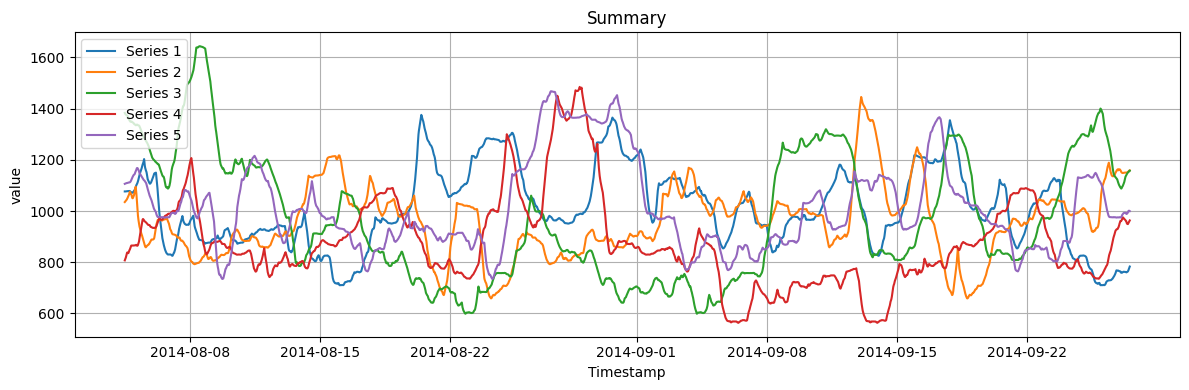

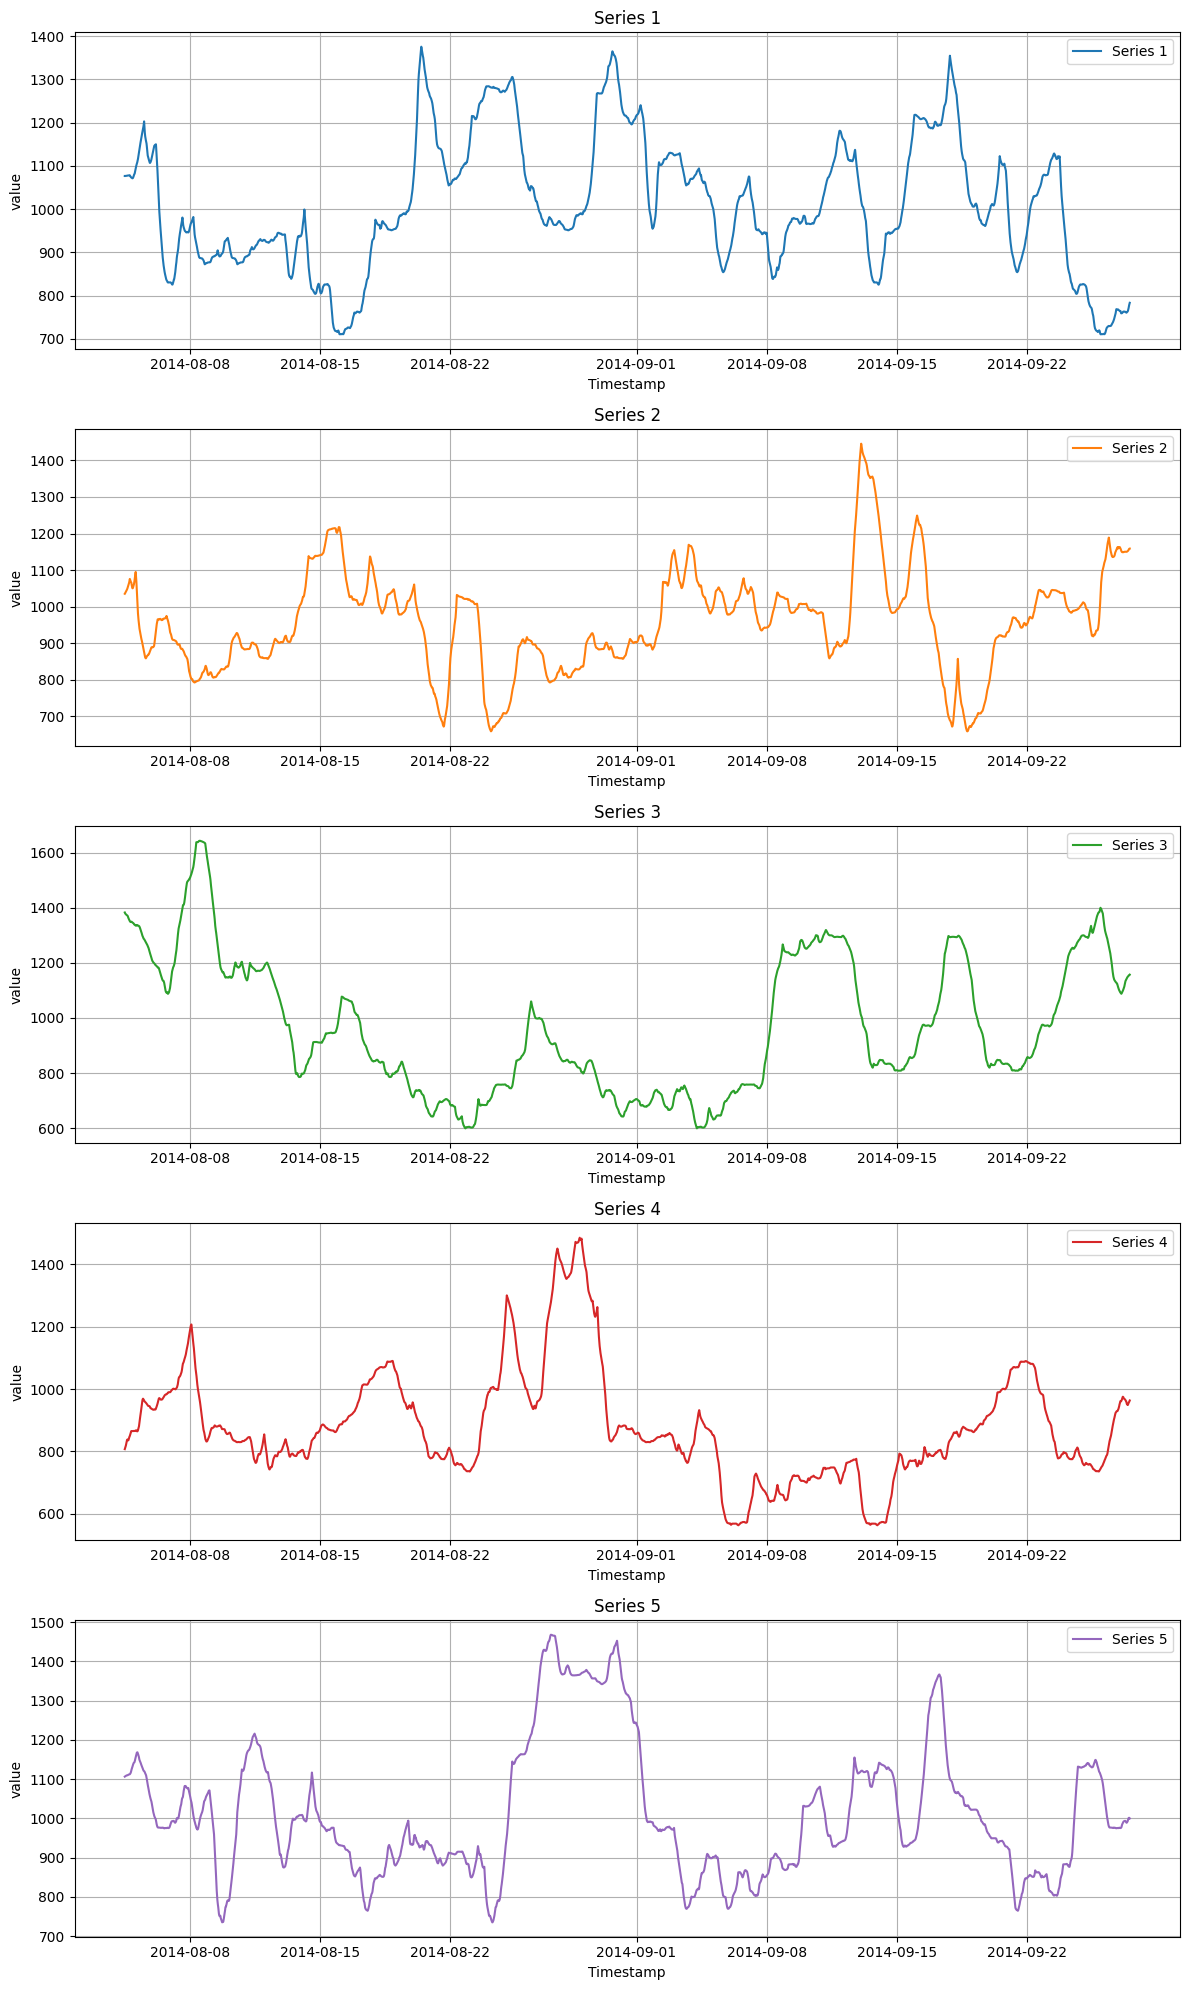

In [10]:
ampiimts.plot_multiple_dfs([matrix_profiles[0],matrix_profiles[1],matrix_profiles[2],matrix_profiles[3],matrix_profiles[4]], column='value')

Best consensus window size(s): [(288, '24h', np.float32(0.018312242), np.float64(0.0)), (144, '12h', np.float32(0.021885766), np.float64(0.0)), (576, '48h', np.float32(0.022436354), np.float64(0.0))]
Best window sizes (hours): 24h, 12h, 48h


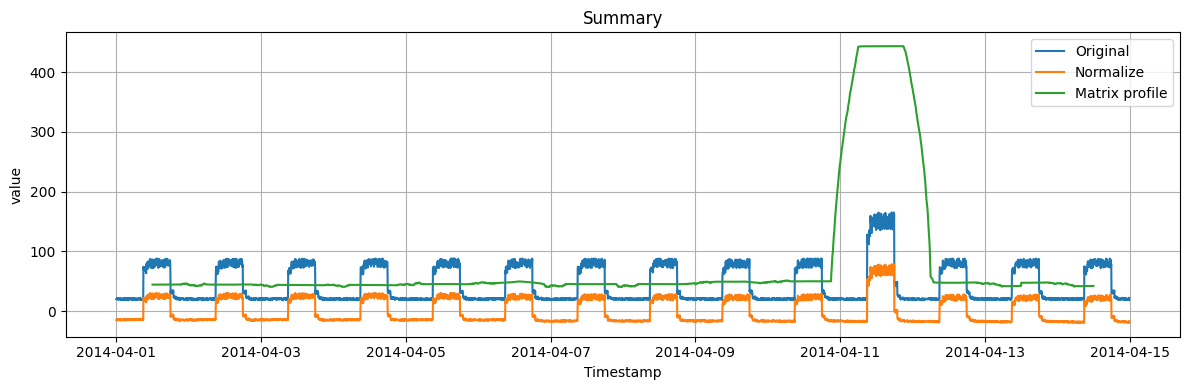

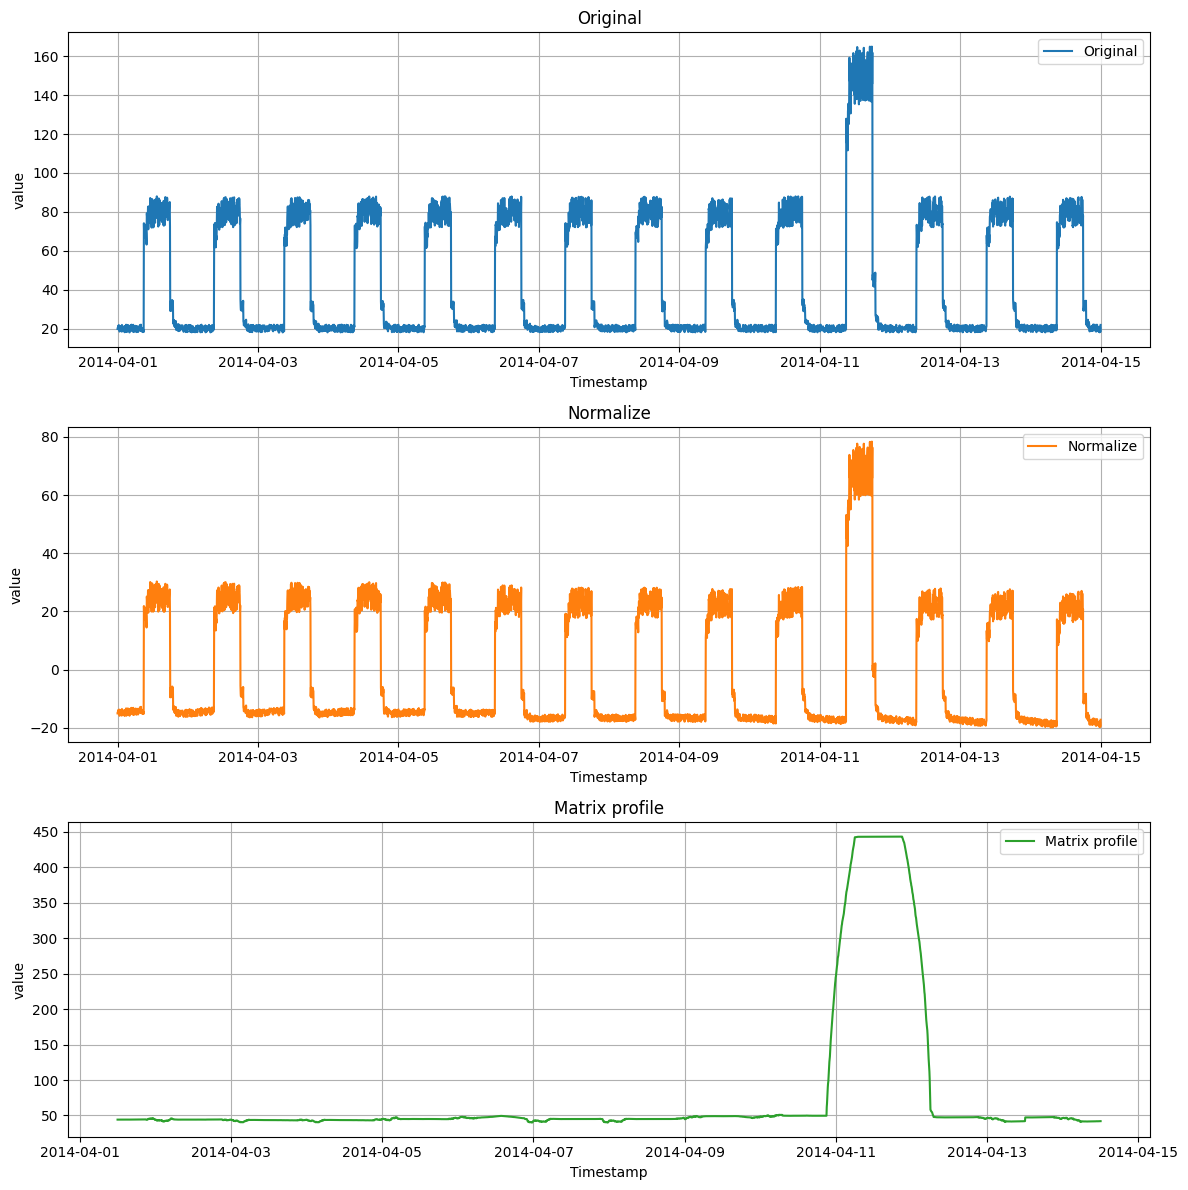

timing : 3.8262177350006823


In [6]:
# --- import of CSV file ---
start_time = time.perf_counter()

# get original dataframe
df = pd.read_csv('../../dataset/art_daily_jumpsup.csv')
df_normalize = ampiimts.pre_processed(df)
df_profile = ampiimts.matrix_profile(df_normalize)
ampiimts.plot_multiple_dfs([df, df_normalize, df_profile], ['Original', 'Normalize', 'Matrix profile'], column='value')
end_time = time.perf_counter()
print(f"timing : {end_time - start_time}")